<a href="https://colab.research.google.com/github/shravanipinjarla/cs666student/blob/main/Shravani_CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

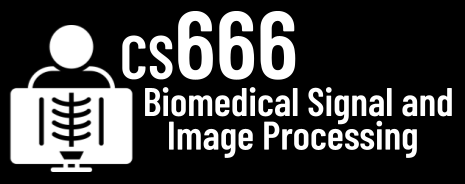
#Assignment 5

In [1]:
# NAME: Shravani Pinjarla

In [2]:
# In this assignment, we will visualize and explore a CT scan!

In [3]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.9 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [5]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [6]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [7]:
# TODO: 220 slices

In [8]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [9]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

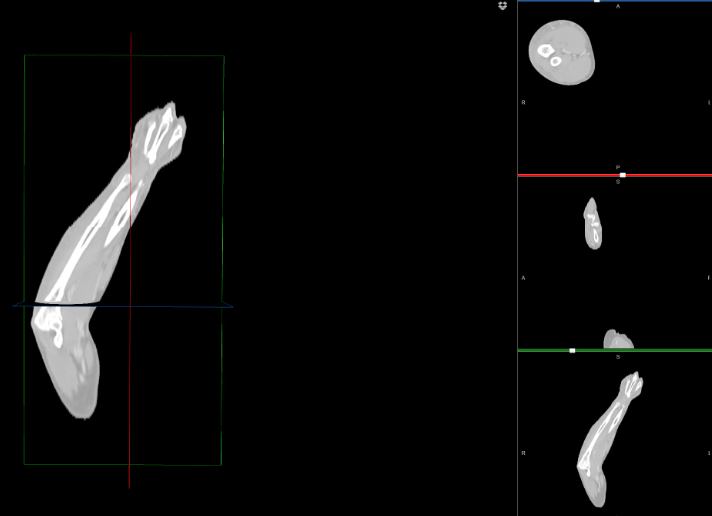

In [10]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [11]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

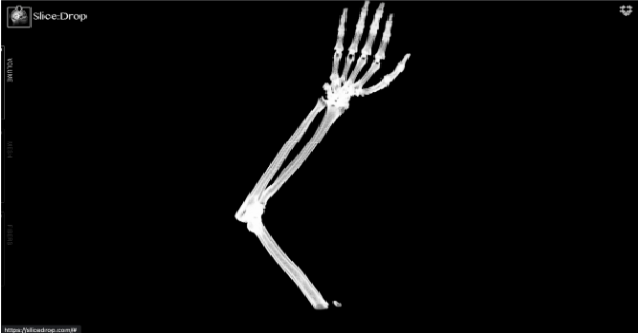

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [12]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [13]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [14]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [15]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

In [16]:
from pydicom import dcmread
import os
import numpy as np
import pydicom

# Directory containing the DICOM files
dir_path = "./ct/"

# Get a sorted list of file names in the directory
file_names = os.listdir(dir_path)
file_names.sort()

# Read the dimensions of the first DICOM file to create the 3D numpy array
first_file = pydicom.dcmread(os.path.join(dir_path, file_names[0]))
num_slices = len(file_names)
dim_x = int(first_file.Rows)
dim_y = int(first_file.Columns)
ct_volume = np.zeros((dim_x, dim_y, num_slices), dtype=np.float32)

# Loop through all the DICOM files and store them in the numpy array
for i, file_name in enumerate(file_names):
    ds = pydicom.dcmread(os.path.join(dir_path, file_name))
    ct_slice = ds.pixel_array.astype(np.float32)
    ct_volume[:, :, i] = ct_slice

In [17]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

In [18]:
# TODO: YOUR CODE FOR AXIAL

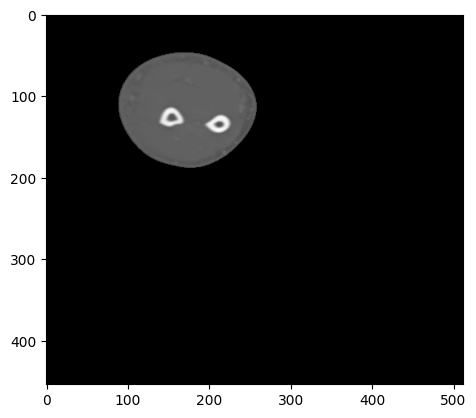

In [19]:
import matplotlib.pyplot as plt

# Create and show an axial slice
axial_slice = ct_volume[:, :, 100]
plt.imshow(axial_slice, cmap='gray')
plt.show()

In [20]:
# TODO: YOUR CODE FOR SAGITTAL

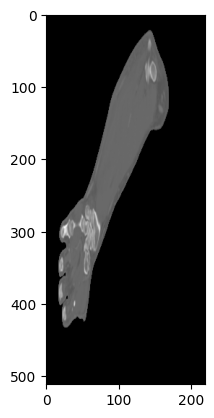

In [21]:
# Create and show a sagittal slice
sagittal_slice = ct_volume[100, :, :]
plt.imshow(sagittal_slice, cmap='gray')
plt.show()

In [22]:
# TODO: YOUR CODE FOR CORONAL

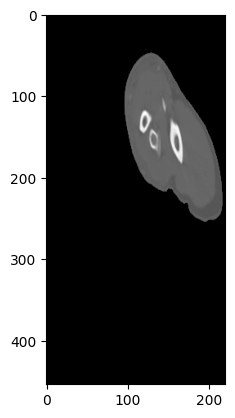

In [23]:
# Create and show a coronal slice
coronal_slice = ct_volume[:, 100, :]
plt.imshow(coronal_slice, cmap='gray')
plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [24]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [25]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [26]:
# TODO: YOUR CODE

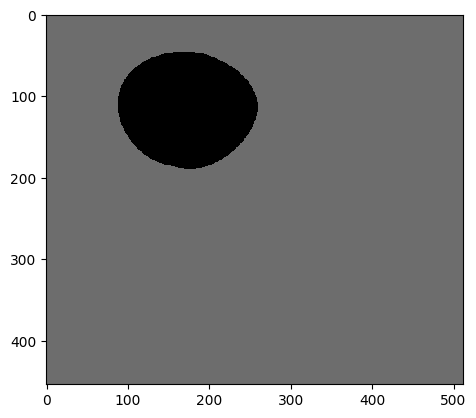

In [27]:

# Get a list of all the filenames in the directory and sort them
file_names = os.listdir(dir_path)
file_names.sort()

# Read in the first DICOM file to get the dimensions of the volume and the Window/Level values
first_file = dcmread(os.path.join(dir_path, file_names[0]))
rows = first_file.Rows
columns = first_file.Columns
num_slices = len(file_names)
window_center = first_file[0x0028, 0x1050].value
window_width = first_file[0x0028, 0x1051].value
rescale_intercept = first_file[0x0028, 0x1052].value

# Create a numpy array to store the volume data
volume = np.zeros((rows, columns, num_slices), dtype=first_file.pixel_array.dtype)

# Loop through all the DICOM files and store them in the numpy array
for i, file_name in enumerate(file_names):
    file_path = os.path.join(dir_path, file_name)
    dicom_file = dcmread(file_path)
    volume[:, :, i] = dicom_file.pixel_array

# Choose a slice to visualize with Window/Level adjustment
slice_num = 100
slice_data = volume[:, :, slice_num]
slice_data_hu = slice_data * rescale_intercept + first_file.RescaleSlope

# Calculate the Window/Level values for the slice
vmin = window_center - window_width/2
vmax = window_center + window_width/2

# Show the slice with Window/Level adjustment
plt.imshow(slice_data_hu, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [28]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

In [29]:
# TODO: YOUR CODE

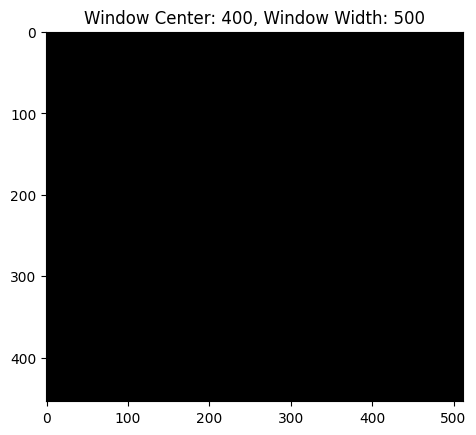

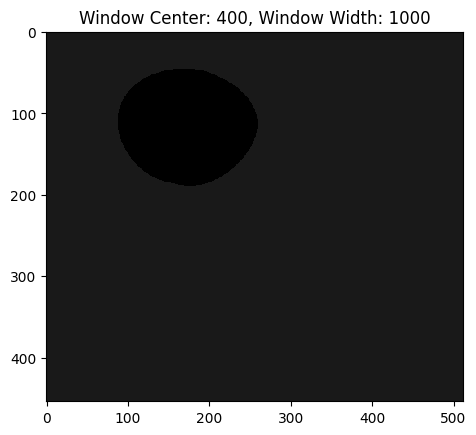

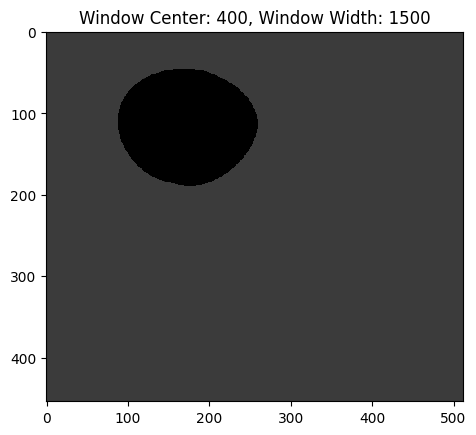

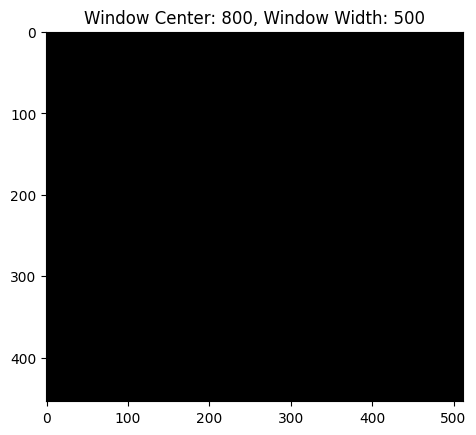

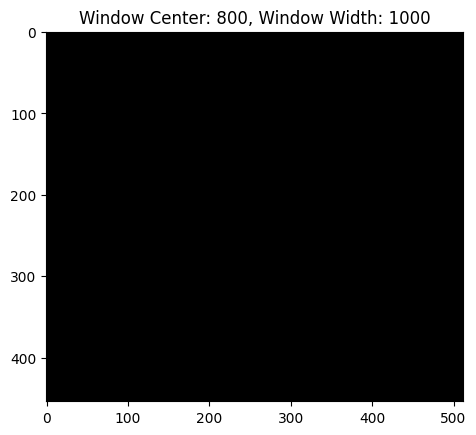

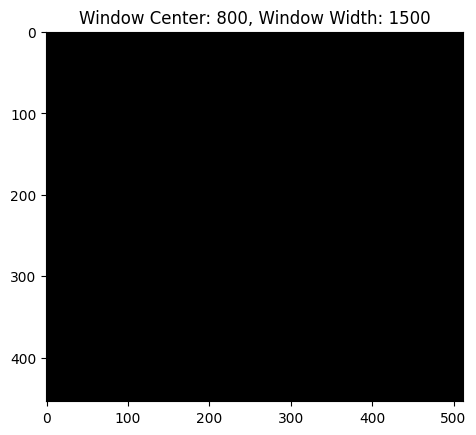

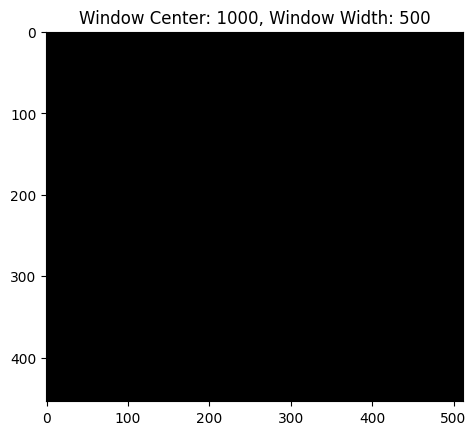

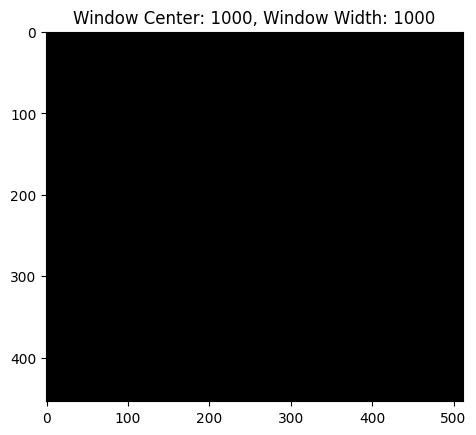

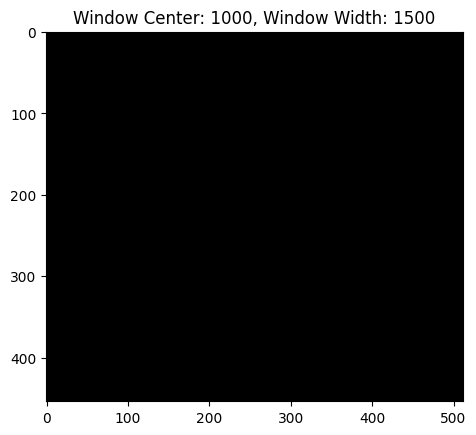

In [30]:

# TODO: YOUR CODE

import os
import numpy as np
import matplotlib.pyplot as plt
from pydicom import dcmread

# Define the path to the directory containing the DICOM files
dir_path = "./ct"

# Get a list of all the filenames in the directory and sort them
file_names = os.listdir(dir_path)
file_names.sort()

# Read in the first DICOM file to get the dimensions of the volume and the Window/Level values
first_file = dcmread(os.path.join(dir_path, file_names[0]))
rows = first_file.Rows
columns = first_file.Columns
num_slices = len(file_names)
window_center = first_file[0x0028, 0x1050].value
window_width = first_file[0x0028, 0x1051].value
rescale_intercept = first_file[0x0028, 0x1052].value

# Create a numpy array to store the volume data
volume = np.zeros((rows, columns, num_slices), dtype=first_file.pixel_array.dtype)

# Loop through all the DICOM files and store them in the numpy array
for i, file_name in enumerate(file_names):
    file_path = os.path.join(dir_path, file_name)
    dicom_file = dcmread(file_path)
    volume[:, :, i] = dicom_file.pixel_array

# Choose a slice to visualize with Window/Level adjustment
slice_num = 100
slice_data = volume[:, :, slice_num]
slice_data_hu = slice_data * rescale_intercept + first_file.RescaleSlope

# Experiment with different Window/Level values
window_centers = [400, 800, 1000]
window_widths = [500, 1000, 1500]

for center in window_centers:
    for width in window_widths:
        vmin = center - width/2
        vmax = center + width/2
        plt.imshow(slice_data_hu, cmap='gray', vmin=vmin, vmax=vmax)
        plt.title("Window Center: {}, Window Width: {}".format(center, width))
        plt.show()

In [31]:
# Which values make sense and why?

In [32]:
# TODO: YOUR ANSWER

We can say that the Center 400 and width 1500 is doing good.

With these values we successfully visualized the bone structures adn also the contrast is good, showing around the soft tissues all along.

The optimal value may vary depending on the preference of the viewers or the specific diagnostic task at hand.


**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [33]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [34]:
# TODO: YOUR CODE TO SEGMENT FAT

In [35]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

In [36]:
# TODO: YOUR CODE TO SEGMENT BONES

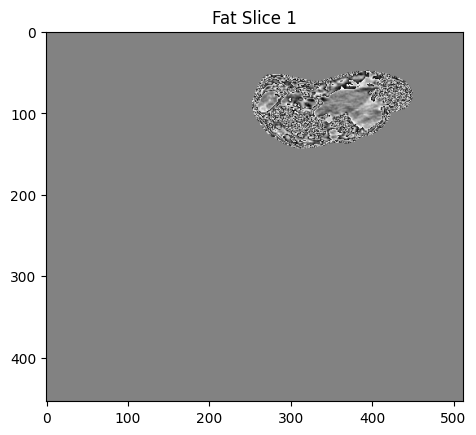

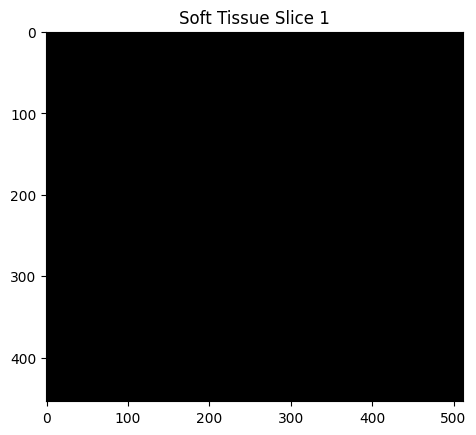

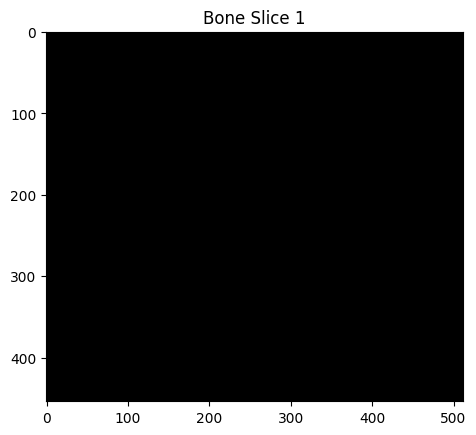

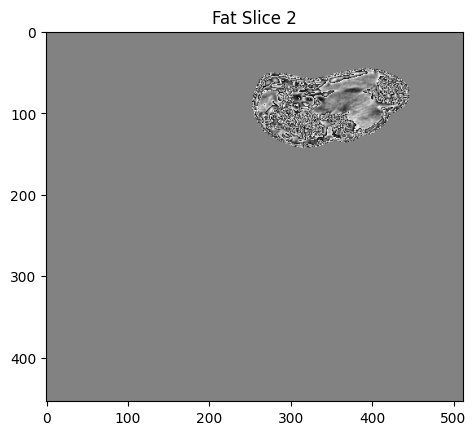

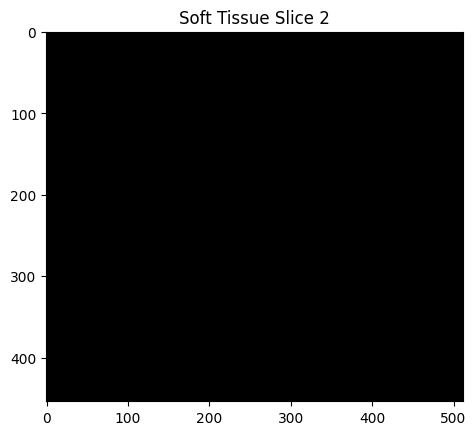

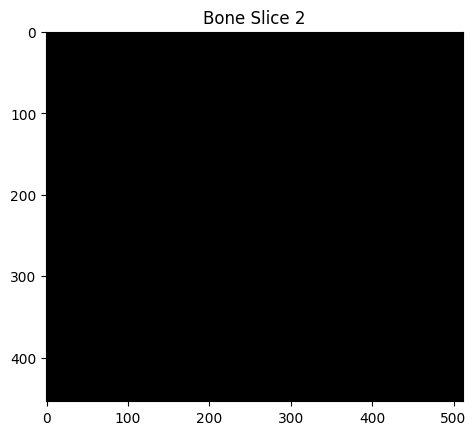

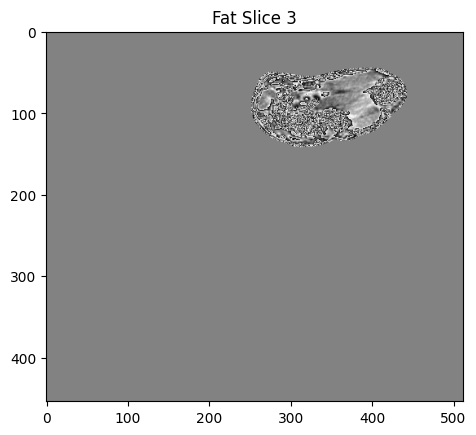

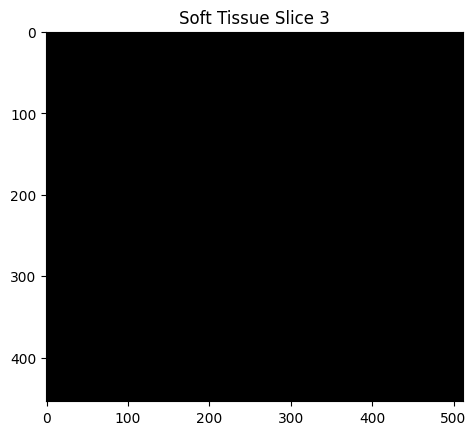

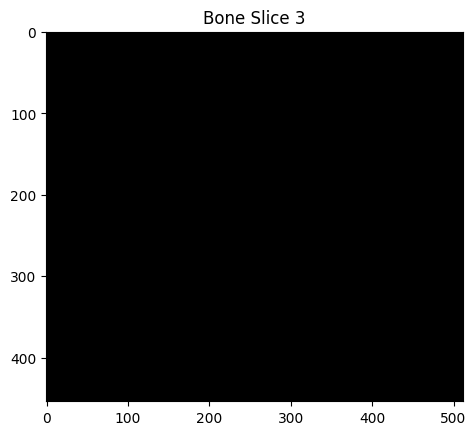

In [37]:
# Read in the first DICOM file to get the dimensions of the volume and the Window/Level values
first_file = dcmread(os.path.join(dir_path, file_names[0]))
rows = first_file.Rows
columns = first_file.Columns
num_slices = len(file_names)
window_center = first_file[0x0028, 0x1050].value
window_width = first_file[0x0028, 0x1051].value
rescale_intercept = first_file[0x0028, 0x1052].value

# Create a numpy array to store the volume data
volume = np.zeros((rows, columns, num_slices), dtype=first_file.pixel_array.dtype)

# Loop through all the DICOM files and store them in the numpy array
for i, file_name in enumerate(file_names):
    file_path = os.path.join(dir_path, file_name)
    dicom_file = dcmread(file_path)
    volume[:, :, i] = dicom_file.pixel_array

# Convert the volume data to Hounsfield Units (HU)
volume_hu = volume * rescale_intercept + first_file.RescaleSlope

# Create segmentation masks for Fat, Soft Tissue, and Bones components
fat_mask = volume_hu.copy()
fat_mask[fat_mask > -60] = 0
fat_mask = np.int16(fat_mask)

tissue_mask = volume_hu.copy()
tissue_mask[tissue_mask < 30] = 0
tissue_mask[tissue_mask > 100] = 0
tissue_mask = np.int16(tissue_mask)

bone_mask = volume_hu.copy()
bone_mask[bone_mask < 300] = 0
bone_mask = np.int16(bone_mask)

# Visualize each of the 3 slices per structure to showcase the segmentation
for i in range(3):
    # Show Fat segmentation
    plt.imshow(fat_mask[:, :, i+50], cmap='gray')
    plt.title("Fat Slice {}".format(i+1))
    plt.show()

    # Show Soft Tissue segmentation
    plt.imshow(tissue_mask[:, :, i+50], cmap='gray')
    plt.title("Soft Tissue Slice {}".format(i+1))
    plt.show()

    # Show Bone segmentation
    plt.imshow(bone_mask[:, :, i+50], cmap='gray')
    plt.title("Bone Slice {}".format(i+1))
    plt.show()


In [38]:
# Are the segmentations good?

In [39]:
# TODO: YOUR ANSWER

Based on the above visualizations we can say that the segmentation is not good for the Fat and soft tissues and however with other additional properties such as augementing the image with different thresholds we can identify them from data. 

In [40]:
#Reference Stackoverflow

In [41]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#           \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""